<a href="https://colab.research.google.com/github/rodnm/insta_web-scraping/blob/main/insta_web_scraping_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testeo de web scraping de `economicaperu`

In [59]:
!pip install instaloader

## Usando archivos `txt`

### Librerías

In [60]:
import instaloader
import pandas as pd
import re
import os
import shutil

### Extracción de datos generales de perfil de `economicaperu`

Siguiendo la guía y ejemplo de la publicación de [Make Use Of (2022)](https://www.makeuseof.com/python-instagram-fetch-data/), extraemos datos generales del perfil de `economicaperu` usando la librería [Instaloader](https://instaloader.github.io/as-module.html).

In [61]:
USER = 'economicaperu'

In [62]:
USER = 'economicaperu'

# Creando una instancia de la clase Instaloader
bot = instaloader.Instaloader()

# Cargando un perfil desde un identificador de Instagram
profile = instaloader.Profile.from_username(bot.context, USER)
print("Username: ", profile.username)
print("User ID: ", profile.userid)
print("Number of Posts: ", profile.mediacount)
print("Followers Count: ", profile.followers)
print("Following Count: ", profile.followees)
print("Bio: ", profile.biography)
print("External URL: ", profile.external_url)

# emails de bio si existen
emails = re.findall(r"\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b", profile.biography)
print("Emails extracted from the bio:")
print(emails)

Username:  economicaperu
User ID:  7228077074
Number of Posts:  2032
Followers Count:  15033
Following Count:  124
Bio:  Organización de estudiantes de Economía de la PUCP
External URL:  https://linktr.ee/economicaperu
Emails extracted from the bio:
[]


Si previamente existe la carpeta de `USER` con los archivos que vamos a descargar (debido a volver a que estamos corriendo el código nuevamente) mejor los eliminarlos para evitar errores.

### Eliminamos archivos residuales si existen

In [4]:
carpeta = USER

# Verificar si la carpeta existe
if os.path.exists(carpeta) and os.path.isdir(carpeta):
    # Iterar sobre cada archivo en la carpeta
    for archivo in os.listdir(carpeta):
        if archivo.endswith(".txt") or archivo.endswith(".json") or archivo.endswith(".json.xz") or archivo.endswith(".jpg"):
            # Construir la ruta completa del archivo
            ruta_completa = os.path.join(carpeta, archivo)
            # Eliminar el archivo
            os.remove(ruta_completa)

    # Eliminar la carpeta misma
    shutil.rmtree(carpeta)

    print("Carpeta y archivos eliminados exitosamente.")
else:
    print("La carpeta no existe. No se realizaron cambios.")


La carpeta no existe. No se realizaron cambios.


### Extracción de datos usando `instaloader`

Esta linea de código (`!instaloader...`) se ejecuta en la terminal y descarga la metadata `(fecha, likes, comentarios y descripción)` de cada post en archivos `.txt`,`.json` y `.json.xz`, además, descarga la foto de perfil de la cuenta en `.jpg`.

El problema de ejecutar esta linea de código es que es al ser muchos post eso es detectado por la API de Instagram como actividad sospechosa y genera el error `Fatal error: 400 Bad Request` o `JSON Query to graphql/query: HTTP error code 401`.

La única manera de evitar algún problema es corriendo esto en la terminal de la PC (sea Windows, Mac o UNIX/Linux) y parar al ver alguno de estos errores. Después de una hora mínimo, repetir la ejecución del código y volver a parar si aparece algún error. Y así repetir hasta conseguir todos los archivos con la metadata de cada post.

Este proceso puede tardar algunas (1-3) horas.

Tener **cuidado** al ejecutar esta línea de código mientras alguien usa la app.
```
Number of requests within last 10/11/20/22/30/60 minutes grouped by type:
    iphone:    1    1    1    1    1    1
   android:    1    1    1    1    1    1
   * linux:    1    1    1    1    1    1
Instagram responded with HTTP error "429 - Too Many Requests". Please
do not run multiple instances of Instaloader in parallel or within
short sequence. Also, do not use any Instagram App while Instaloader
is running.
```
Mejor es correrlo en horas de poco uso cuando no se publica nada o en la madrugada.


In [64]:
!instaloader --no-pictures --no-videos --post-metadata-txt "{date_utc}|{likes}|{comments}|{caption}" --comments economicaperu

Hint: Use --login to download higher-quality versions of pictures.
[1/1] Downloading profile economicaperu
economicaperu/2021-06-08_14-41-41_UTC_profile_pic.jpg already exists
Retrieving posts from profile economicaperu.
Resuming from economicaperu/iterator_j56jUj7m.json.xz.
[  32/2032] [2024-04-14_17-12-12|276|7|Est…] unchanged JSON Query to graphql/query: HTTP error code 401. [retrying; skip with ^C]
JSON Query to graphql/query: HTTP error code 401. [retrying; skip with ^C]
Download <Post C5v_SAJuHu4> of economicaperu: JSON Query to graphql/query: HTTP error code 401.
[  33/2032] [2024-04-14_17-07-41|126|2|PAR…] unchanged JSON Query to graphql/query: HTTP error code 401. [retrying; skip with ^C]
JSON Query to graphql/query: HTTP error code 401. [retrying; skip with ^C]
Download <Post C5v-w-UuqBf> of economicaperu: JSON Query to graphql/query: HTTP error code 401.
[  34/2032] [2024-04-14_17-03-34|196|3|PAR…] unchanged JSON Query to graphql/query: HTTP error code 401. [retrying; skip w

Debido a esta dificultad ya tengo un archivo .zip que he podido generar en mi PC donde ya concluí ese bucle de ejecutar esa línea de código. Es este archivo comprimido se encuentra los datos de 2057 posts.

El motivo por el que es mayor al número de post de 2026 que previamente revisamos con Instaloader es por duplicados de los últimos post por estar usando datos guardados previamente y descargando nuevos.

### Restaurando backup de datos extraidos previamente

In [63]:
import zipfile

# Ruta del archivo ZIP y el directorio de destino
zip_file_path = 'economicaperu.zip'
output_dir = './economicaperu'

# Asegurarse de que el directorio de destino exista
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Abrir y extraer el archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

print(f"Archivo descomprimido en: {output_dir}")


Archivo descomprimido en: ./economicaperu


### Guardando backup con nuevos datos si se uso `instaloader`

Guardamos la carpeta `economicaperu` para tener una cópia de lo más actualizado y tardar menos tiempo en futuras extracciones de metadata con `instaloader`.

In [65]:
# Ruta de la carpeta a comprimir
folder_path = "economicaperu"

# Nombre del archivo zip
zip_file_name = "economicaperu.zip"

# Función para agregar archivos a un archivo zip
def zip_folder(folder_path, zip_file_name):
    with zipfile.ZipFile(zip_file_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, folder_path)
                zipf.write(file_path, arcname)

# Llamar a la función para comprimir la carpeta
zip_folder(folder_path, zip_file_name)

print(f"Carpeta '{folder_path}' comprimida en '{zip_file_name}'")

Carpeta 'economicaperu' comprimida en 'economicaperu.zip'


### Creación de la lista datos que contiene la información de los `txt`

Esta celda de código se encarga de eliminar cualquier hashtags  que pueda aparecer entre las fechas si ocurriece.

Después se encarga de detectar todos los archivos txt de la carpeta `economicaperu`, detecta cada nuevo registro y aplana el todos los datos de cada archivo (caption con varios saltos de línea) y los agrupa en una lista `datos`.

In [66]:
# Función para eliminar hashtags de una cadena
def eliminar_hashtags(cadena):
    return re.sub(r'#\w+\s*', '', cadena)

# Ruta de la carpeta que contiene los archivos txt
carpeta = USER

# Lista para almacenar los datos de cada archivo
datos = []

# Expresión regular para detectar la fecha al inicio de una línea
patron_fecha = re.compile(r'^\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2}')

# Iterar sobre cada archivo en la carpeta
for archivo in os.listdir(carpeta):
    if archivo.endswith(".txt"):
        with open(os.path.join(carpeta, archivo), "r", encoding="utf-8") as f:
            lineas = f.readlines()

            # Variables para agrupar datos
            registro_actual = []
            for linea in lineas:
                linea = linea.strip()
                if patron_fecha.match(linea):
                    if registro_actual:
                        # Unir el caption y agregar el registro a los datos
                        if len(registro_actual) == 4:
                            datos.append(registro_actual)
                    # Iniciar un nuevo registro
                    partes = linea.split("|", 3)
                    if len(partes) == 4:
                        registro_actual = partes
                        registro_actual[3] = [registro_actual[3]]  # Convertir caption en lista
                    else:
                        registro_actual = []
                else:
                    if registro_actual:
                        registro_actual[3].append(linea)

            # Agregar el último registro
            if registro_actual and len(registro_actual) == 4:
                datos.append(registro_actual)

# Aplanar los captions
for registro in datos:
    registro[3] = " ".join(registro[3])

### Creación del dataframe

Se transforma la lista `datos` en un `dataframe` y se guarda como un archivo `.csv`.

In [67]:
import unicodedata
from datetime import datetime
import pytz

# Crear un DataFrame con los datos
df = pd.DataFrame(datos, columns=["fecha", "likes", "comments", "caption"])

# Convertir columnas "likes" y "comments" a tipo numérico
df["likes"] = pd.to_numeric(df["likes"], errors='coerce')
df["comments"] = pd.to_numeric(df["comments"], errors='coerce')

# Eliminar filas con valores NaN en la columna "likes"
df = df.dropna(subset=["likes"])

# Convertir la columna "fecha" a tipo datetime con el formato adecuado y establecerla en UTC
df["fecha"] = pd.to_datetime(df["fecha"], format="%Y-%m-%d_%H-%M-%S", errors='coerce', utc=True)

# Eliminar filas con valores NaN en la columna "fecha"
df = df.dropna(subset=["fecha"])

# Convertir la columna "fecha" a UTC-5
df["fecha"] = df["fecha"].dt.tz_convert("Etc/GMT+5")

# Ordenar el DataFrame por la columna "fecha" y luego por "likes" de manera descendente
df = df.sort_values(by=["fecha", "likes"], ascending=[True, False])

# Eliminar duplicados, quedándose con la fila con más likes para cada fecha
df = df.drop_duplicates(subset="fecha", keep="first")

# Ordenar el DataFrame por la columna "fecha" de manera descendente
df = df.sort_values(by="fecha", ascending=True)

# Reiniciar el índice del DataFrame
df.reset_index(drop=True, inplace=True)

# Definir el diccionario section_keywords
section_keywords = {
        "Web": ["Econext", "Ecotidiano", "¿QuéSignifica?", "¿Qué Significa", "Animenomics", "OpinaEconómica", "Opina Económica", "LaNoticiaDeLaSemana", "La Noticia De La Semana", "Economanía", "Ecomundo", "EconómicaInforma", "Económica Informa", "NotaEconómica", "Nota Económica"],
        "AEI": ["Infografía", "Reel"],
        "Finanzas": ["NotaInformativa", "Nota Informativa", "FinanceReport", "Finance Report", "Publicidad"],
        "Investigación": ["Artículo"],
        "Colaboración": ["DíaDeLaTierra", "Día De La Tierra"]
}

# Función para eliminar tildes de un texto
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return "".join([c for c in nfkd_form if not unicodedata.combining(c)])

# Función para asignar 'section' y 'area' basado en 'caption'
def assign_section_area(caption):
    normalized_caption = remove_accents(caption).lower()

    for area, sections in section_keywords.items():
        for section in sections:
            normalized_section = remove_accents(section).lower()
            if normalized_section in normalized_caption:
                return section, area
    return None, None

# Normalizar las palabras clave en section_keywords
section_keywords_normalized = {area: [remove_accents(section).lower() for section in sections] for area, sections in section_keywords.items()}

# Crear las columnas 'section' y 'area'
df[['section', 'area']] = df['caption'].apply(lambda x: pd.Series(assign_section_area(x)))

# Reemplazar los espacios en la columna 'section' con una cadena vacía
df['section'] = df['section'].str.replace(' ', '')

# Reemplazar los valores de 'QuéSignifica' y '¿QuéSignifica' por '¿QuéSignifica?'
df['section'] = df['section'].replace(['¿QuéSignifica', 'QuéSignifica'], '¿QuéSignifica?')

# Añadir columnas de año, mes, día y hora
df["año"] = df["fecha"].dt.year
df["mes"] = df["fecha"].dt.month
df["dia"] = df["fecha"].dt.day
df["hora"] = df["fecha"].dt.hour

# Reordenar las columnas
# los valores de area y section van a tener tildes como se define en section_keywords, incluso si en el texto de caption no lo incluye.
df = df[["fecha", "año", "mes", "dia", "hora", "area", "section", "likes", "comments", "caption"]]


# Guardar el DataFrame como un archivo CSV con la fecha y hora actuales

# Definir la zona horaria UTC-5
utc_minus_5 = pytz.timezone('Etc/GMT+5')

# Obtener la fecha y hora actuales en UTC-5
fecha_actual_utc_minus_5 = datetime.now(utc_minus_5).strftime("%Y-%m-%d_%H-%M-%S")

# Crear el nombre del archivo con la fecha y hora actuales en UTC-5
file_name = f"datos_{USER}_{fecha_actual_utc_minus_5}.csv"
df.to_csv(file_name, index=False)
print(f"DataFrame guardado como {file_name}")
print("")
print(df.shape)
print("")

# Mostrar el DataFrame
print(df.head(10))


DataFrame guardado como datos_economicaperu_2024-06-02_21-53-33.csv

(2028, 10)

                      fecha   año  mes  dia  hora           area  \
0 2018-03-13 15:12:34-05:00  2018    3   13    15           None   
1 2018-03-14 00:48:54-05:00  2018    3   14     0           None   
2 2018-03-14 18:32:05-05:00  2018    3   14    18           None   
3 2018-03-15 11:08:12-05:00  2018    3   15    11           None   
4 2018-03-15 15:44:48-05:00  2018    3   15    15  Investigación   
5 2018-03-16 18:35:33-05:00  2018    3   16    18  Investigación   
6 2018-03-18 21:29:00-05:00  2018    3   18    21            Web   
7 2018-03-18 23:31:17-05:00  2018    3   18    23            Web   
8 2018-03-20 10:56:53-05:00  2018    3   20    10            Web   
9 2018-03-20 12:30:26-05:00  2018    3   20    12           None   

         section  likes  comments  \
0           None     21         0   
1           None     24         0   
2           None     17         2   
3           None     1

### Valores únicos en `area` y `section`

In [68]:
print(f"Valores únicos de 'area': {df.area.unique()}")
print("")
print(f"Valores únicos de 'section': {df.section.unique()}")

Valores únicos de 'area': [None 'Investigación' 'Web' 'Finanzas' 'AEI' 'Colaboración']

Valores únicos de 'section': [None 'Artículo' 'NotaEconómica' 'NotaInformativa' 'EconómicaInforma'
 'Infografía' 'Publicidad' 'OpinaEconómica' 'LaNoticiaDeLaSemana'
 'Economanía' 'Ecomundo' 'FinanceReport' 'Econext' 'Ecotidiano'
 '¿QuéSignifica?' 'Animenomics' 'DíaDeLaTierra']


### Filas vacías en `area` y `section`

In [69]:
# Contar el número de filas vacías en 'area' y 'section'
num_empty_area = df['area'].isnull().sum()
num_empty_section = df['section'].isnull().sum()

print(f"Número de filas vacías en 'area': {num_empty_area}")
print(f"Número de filas vacías en 'section': {num_empty_section}")

# Identificar los índices de las filas vacías en 'area' y 'section'
empty_area_indices = df[df['area'].isnull()].index
empty_section_indices = df[df['section'].isnull()].index

print(f"Índices de filas vacías en 'area': {empty_area_indices.tolist()}")
print(f"Índices de filas vacías en 'section': {empty_section_indices.tolist()}")

# Identificar las fechas de las filas vacías en 'area' y 'section'
empty_area_dates = df.loc[empty_area_indices, 'fecha']
empty_section_dates = df.loc[empty_section_indices, 'fecha']

print(f"Fechas de filas vacías en 'area': {empty_area_dates.tolist()}")
print(f"Fechas de filas vacías en 'section': {empty_section_dates.tolist()}")

Número de filas vacías en 'area': 448
Número de filas vacías en 'section': 448
Índices de filas vacías en 'area': [0, 1, 2, 3, 9, 12, 18, 23, 24, 29, 31, 49, 55, 56, 60, 71, 73, 83, 114, 150, 155, 163, 169, 173, 175, 179, 189, 191, 198, 199, 200, 202, 203, 208, 220, 263, 264, 267, 285, 291, 306, 308, 309, 311, 312, 313, 314, 328, 329, 330, 331, 341, 343, 344, 347, 349, 355, 357, 358, 361, 363, 366, 368, 373, 376, 378, 380, 384, 386, 390, 391, 394, 401, 407, 408, 410, 412, 413, 415, 417, 418, 421, 422, 424, 430, 434, 435, 436, 439, 443, 444, 446, 451, 453, 454, 456, 463, 467, 477, 482, 483, 490, 497, 498, 503, 505, 506, 521, 530, 545, 550, 551, 552, 556, 557, 558, 563, 565, 573, 575, 576, 578, 579, 581, 582, 583, 585, 586, 587, 588, 589, 594, 597, 599, 602, 606, 608, 615, 621, 642, 651, 657, 667, 668, 675, 681, 684, 686, 696, 697, 699, 701, 715, 717, 721, 726, 730, 732, 740, 742, 750, 752, 753, 756, 757, 759, 763, 764, 766, 770, 774, 786, 806, 807, 814, 820, 828, 833, 847, 848, 852, 853

### Dataframe completo

In [70]:
df

,fecha,año,mes,dia,hora,area,section,likes,comments,caption
0,2018-03-13 15:12:34-05:00,2018,3,13,15,None,None,21,0,No te pierdas nuestros cursos de Stata Nivel ...
1,2018-03-14 00:48:54-05:00,2018,3,14,0,None,None,24,0,"""El dinero puede servir para liberar al indivi..."
2,2018-03-14 18:32:05-05:00,2018,3,14,18,None,None,17,2,No te pierdas la oportunidad de ser parte de n...
3,2018-03-15 11:08:12-05:00,2018,3,15,11,None,None,14,2,La Organización Económica y el Centro de Estud...
4,2018-03-15 15:44:48-05:00,2018,3,15,15,Investigación,Artículo,16,0,Proyecto de ley de la comisión de trabajo ampl...
...,...,...,...,...,...,...,...,...,...,...
2023,2024-05-23 18:25:43-05:00,2024,5,23,18,None,None,305,5,¿Sabías que las promociones de Yape están camb...
2024,2024-05-24 09:58:36-05:00,2024,5,24,9,AEI,Infografía,414,14,🌟 De Guardianes a Engreídos del Hogar 🌟 Nuest...
2025,2024-05-25 20:13:12-05:00,2024,5,25,20,None,None,84,0,El debate sobre la implementación de “robots m...
2026,2024-05-28 17:48:08-05:00,2024,5,28,17,Web,Ecomundo,54,0,#Ecomundo “Explorando la solidez económica de ...


### Gráfico de serie de likes

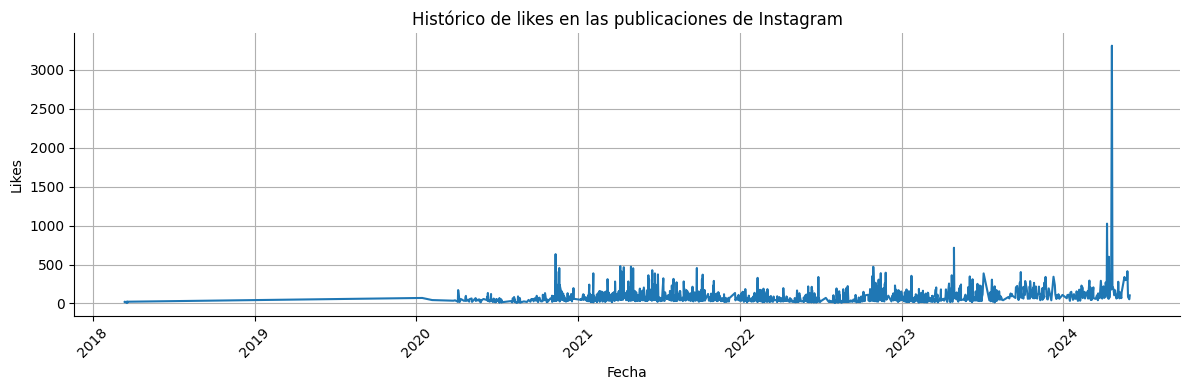

In [71]:
import matplotlib.pyplot as plt

# Crear un gráfico de serie de tiempo (fecha vs likes)
plt.figure(figsize=(12, 4))
plt.plot(df['fecha'], df['likes'])
#plt.plot(df['fecha'], df['likes'], marker='o', linestyle='-')
plt.title('Histórico de likes en las publicaciones de Instagram')
plt.xlabel('Fecha')
plt.ylabel('Likes')
plt.xticks(rotation=45)
plt.grid(True)

# Ajustar spines
ax = plt.gca()
ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

## Usando los archivos `json.xz`

In [72]:
USER = 'economicaperu'

### Librerías necesarias

In [73]:
import instaloader
import pandas as pd
import re
import os
import shutil

import json
import lzma
from datetime import datetime
import unicodedata
import pytz

### Creando la lista `post_data`

In [74]:
# Directorio donde se descargaron los archivos JSON comprimidos
directory = USER   # Reemplaza USER con el nombre del perfil

# Lista para almacenar los datos de cada post
posts_data = []

# Iterar sobre los archivos JSON comprimidos (json.xz) en el directorio
for filename in os.listdir(directory):
    if filename.endswith('.json.xz'):
        filepath = os.path.join(directory, filename)
        with lzma.open(filepath, 'rt') as file:
            try:
                post_metadata = json.load(file)
                print(f"Loaded JSON file: {filepath}")

                # Verifica si 'node' está presente en los datos
                if 'node' in post_metadata:
                    node = post_metadata['node']

                    # Extraer la información deseada
                    timestamp = node.get('taken_at_timestamp')
                    if timestamp:
                        date = datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')
                    else:
                        date = None

                    likes = node.get('edge_media_preview_like', {}).get('count', 0)
                    comments = node.get('edge_media_to_comment', {}).get('count', 0)
                    caption = node.get('edge_media_to_caption', {}).get('edges', [])
                    caption_text = caption[0]['node']['text'] if caption else ''
                    shortcode = node.get('shortcode', '')
                    media_type = node.get('__typename', '')

                    # Agregar los datos a la lista
                    posts_data.append({
                        'fecha': date,
                        'likes': likes,
                        'comments': comments,
                        'shortcode': shortcode,
                        'caption': caption_text,
                        'media_type': media_type
                    })
                    print(f"Extracted data for post: {filename}")
                else:
                    print(f"No 'node' key in JSON file: {filename}")
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON from file {filename}: {e}")

Loaded JSON file: economicaperu/2023-11-17_23-23-30_UTC.json.xz
Extracted data for post: 2023-11-17_23-23-30_UTC.json.xz
Loaded JSON file: economicaperu/2021-11-01_17-22-07_UTC.json.xz
Extracted data for post: 2021-11-01_17-22-07_UTC.json.xz
Loaded JSON file: economicaperu/2021-02-24_18-31-32_UTC.json.xz
Extracted data for post: 2021-02-24_18-31-32_UTC.json.xz
Loaded JSON file: economicaperu/2022-01-13_21-15-24_UTC.json.xz
Extracted data for post: 2022-01-13_21-15-24_UTC.json.xz
Loaded JSON file: economicaperu/2022-01-21_18-26-00_UTC.json.xz
Extracted data for post: 2022-01-21_18-26-00_UTC.json.xz
Loaded JSON file: economicaperu/2021-04-05_17-16-54_UTC.json.xz
Extracted data for post: 2021-04-05_17-16-54_UTC.json.xz
Loaded JSON file: economicaperu/2024-03-06_23-00-38_UTC.json.xz
Extracted data for post: 2024-03-06_23-00-38_UTC.json.xz
Loaded JSON file: economicaperu/2022-05-05_23-17-21_UTC.json.xz
Extracted data for post: 2022-05-05_23-17-21_UTC.json.xz
Loaded JSON file: economicaperu/

### Creando el dataframe

In [75]:
# Verificar si se han extraído datos
if posts_data:
    # Convertir los datos a un DataFrame de pandas
    df_json = pd.DataFrame(posts_data)

    # Convertir columnas "likes" y "comments" a tipo numérico
    df_json["likes"] = pd.to_numeric(df_json["likes"], errors='coerce')
    df_json["comments"] = pd.to_numeric(df_json["comments"], errors='coerce')

    # Eliminar filas con valores NaN en la columna "likes"
    df_json = df_json.dropna(subset=["likes"])

    # Convertir la columna "fecha" a tipo datetime con el formato adecuado y establecerla en UTC
    df_json["fecha"] = pd.to_datetime(df_json["fecha"], format="%Y-%m-%d %H:%M:%S", errors='coerce', utc=True)

    # Eliminar filas con valores NaN en la columna "fecha"
    df_json = df_json.dropna(subset=["fecha"])

    # Convertir la columna "fecha" a UTC-5
    df_json["fecha"] = df_json["fecha"].dt.tz_convert("Etc/GMT+5")

    # Ordenar el DataFrame por la columna "fecha" y luego por "likes" de manera descendente
    df_json = df_json.sort_values(by=["fecha", "likes"], ascending=[True, False])

    # Eliminar duplicados, quedándose con la fila con más likes para cada fecha
    df_json = df_json.drop_duplicates(subset="fecha", keep="first")

    # Ordenar el DataFrame por la columna "fecha" de manera descendente
    df_json = df_json.sort_values(by="fecha", ascending=True)

    # Reiniciar el índice del DataFrame
    df_json.reset_index(drop=True, inplace=True)

    # Definir el diccionario section_keywords
    section_keywords = {
            "Web": ["Econext", "Ecotidiano", "¿QuéSignifica?", "¿Qué Significa", "Animenomics", "OpinaEconómica", "Opina Económica", "LaNoticiaDeLaSemana", "La Noticia De La Semana", "Economanía", "Ecomundo", "EconómicaInforma", "Económica Informa", "NotaEconómica", "Nota Económica"],
            "AEI": ["Infografía", "Reel"],
            "Finanzas": ["NotaInformativa", "Nota Informativa", "FinanceReport", "Finance Report", "Publicidad"],
            "Investigación": ["Artículo"],
            "Colaboración": ["DíaDeLaTierra", "Día De La Tierra"]
    }

    # Función para eliminar tildes de un texto
    def remove_accents(input_str):
        nfkd_form = unicodedata.normalize('NFKD', input_str)
        return "".join([c for c in nfkd_form if not unicodedata.combining(c)])

    # Función para asignar 'section' y 'area' basado en 'caption'
    def assign_section_area(caption):
        normalized_caption = remove_accents(caption).lower()

        for area, sections in section_keywords.items():
            for section in sections:
                normalized_section = remove_accents(section).lower()
                if normalized_section in normalized_caption:
                    return section, area
        return None, None

    # Normalizar las palabras clave en section_keywords
    section_keywords_normalized = {area: [remove_accents(section).lower() for section in sections] for area, sections in section_keywords.items()}

    # Crear las columnas 'section' y 'area'
    df_json[['section', 'area']] = df_json['caption'].apply(lambda x: pd.Series(assign_section_area(x)))

    # Reemplazar los espacios en la columna 'section' con una cadena vacía
    df_json['section'] = df_json['section'].str.replace(' ', '')

    # Reemplazar los valores de 'QuéSignifica' y '¿QuéSignifica' por '¿QuéSignifica?'
    df_json['section'] = df_json['section'].replace(['¿QuéSignifica', 'QuéSignifica'], '¿QuéSignifica?')

    # Añadir columnas de año, mes, día y hora
    df_json["año"] = df_json["fecha"].dt.year
    df_json["mes"] = df_json["fecha"].dt.month
    df_json["dia"] = df_json["fecha"].dt.day
    df_json["hora"] = df_json["fecha"].dt.hour

    # Reordenar las columnas
    df_json = df_json[["fecha", "año", "mes", "dia", "hora", "area", "section", "likes", "comments", "shortcode", "media_type", "caption"]]

    # Guardar el DataFrame como un archivo CSV con la fecha y hora actuales

    # Definir la zona horaria UTC-5
    utc_minus_5 = pytz.timezone('Etc/GMT+5')

    # Obtener la fecha y hora actuales en UTC-5
    fecha_actual_utc_minus_5 = datetime.now(utc_minus_5).strftime("%Y-%m-%d_%H-%M-%S")

    # Crear el nombre del archivo con la fecha y hora actuales en UTC-5
    file_name = f"datos_{directory}_{fecha_actual_utc_minus_5}.csv"
    df_json.to_csv(file_name, index=False)
    print(f"DataFrame guardado como {file_name}")
    print("")
    print(df_json.shape)
    print("")

    # Mostrar el DataFrame
    print(df_json.head(10))

else:
    print("No data extracted from JSON files.")


DataFrame guardado como datos_economicaperu_2024-06-02_21-54-25.csv

(2028, 12)

                      fecha   año  mes  dia  hora           area  \
0 2018-03-13 15:12:34-05:00  2018    3   13    15           None   
1 2018-03-14 00:48:54-05:00  2018    3   14     0           None   
2 2018-03-14 18:32:05-05:00  2018    3   14    18           None   
3 2018-03-15 11:08:12-05:00  2018    3   15    11           None   
4 2018-03-15 15:44:48-05:00  2018    3   15    15  Investigación   
5 2018-03-16 18:35:33-05:00  2018    3   16    18  Investigación   
6 2018-03-18 21:29:00-05:00  2018    3   18    21            Web   
7 2018-03-18 23:31:17-05:00  2018    3   18    23            Web   
8 2018-03-20 10:56:53-05:00  2018    3   20    10            Web   
9 2018-03-20 12:30:26-05:00  2018    3   20    12           None   

         section  likes  comments    shortcode  media_type  \
0           None     21         0  BgRsA_TjWK8  GraphImage   
1           None     24         0  BgSt-PUDKCz

### Valores únicos en `area`, `section` y `media_type`

In [76]:
print(f"Valores únicos de 'area': {df_json.area.unique()}")
print("")
print(f"Valores únicos de 'section': {df_json.section.unique()}")
print("")
print(f"Valores únicos de 'media_type': {df_json.media_type.unique()}")

Valores únicos de 'area': [None 'Investigación' 'Web' 'Finanzas' 'AEI' 'Colaboración']

Valores únicos de 'section': [None 'Artículo' 'NotaEconómica' 'NotaInformativa' 'EconómicaInforma'
 'Infografía' 'Publicidad' 'OpinaEconómica' 'LaNoticiaDeLaSemana'
 'Economanía' 'Ecomundo' 'FinanceReport' 'Econext' 'Ecotidiano'
 '¿QuéSignifica?' 'Animenomics' 'DíaDeLaTierra']

Valores únicos de 'media_type': ['GraphImage' 'GraphVideo' 'GraphSidecar']


### Filas vacías en `area` y `section`

In [77]:
# Contar el número de filas vacías en 'area' y 'section'
num_empty_area = df_json['area'].isnull().sum()
num_empty_section = df_json['section'].isnull().sum()

print(f"Número de filas vacías en 'area': {num_empty_area}")
print(f"Número de filas vacías en 'section': {num_empty_section}")

# Identificar los índices de las filas vacías en 'area' y 'section'
empty_area_indices = df_json[df_json['area'].isnull()].index
empty_section_indices = df_json[df_json['section'].isnull()].index

print(f"Índices de filas vacías en 'area': {empty_area_indices.tolist()}")
print(f"Índices de filas vacías en 'section': {empty_section_indices.tolist()}")

# Identificar las fechas de las filas vacías en 'area' y 'section'
empty_area_dates = df_json.loc[empty_area_indices, 'fecha']
empty_section_dates = df_json.loc[empty_section_indices, 'fecha']

print(f"Fechas de filas vacías en 'area': {empty_area_dates.tolist()}")
print(f"Fechas de filas vacías en 'section': {empty_section_dates.tolist()}")

Número de filas vacías en 'area': 448
Número de filas vacías en 'section': 448
Índices de filas vacías en 'area': [0, 1, 2, 3, 9, 12, 18, 23, 24, 29, 31, 49, 55, 56, 60, 71, 73, 83, 114, 150, 155, 163, 169, 173, 175, 179, 189, 191, 198, 199, 200, 202, 203, 208, 220, 263, 264, 267, 285, 291, 306, 308, 309, 311, 312, 313, 314, 328, 329, 330, 331, 341, 343, 344, 347, 349, 355, 357, 358, 361, 363, 366, 368, 373, 376, 378, 380, 384, 386, 390, 391, 394, 401, 407, 408, 410, 412, 413, 415, 417, 418, 421, 422, 424, 430, 434, 435, 436, 439, 443, 444, 446, 451, 453, 454, 456, 463, 467, 477, 482, 483, 490, 497, 498, 503, 505, 506, 521, 530, 545, 550, 551, 552, 556, 557, 558, 563, 565, 573, 575, 576, 578, 579, 581, 582, 583, 585, 586, 587, 588, 589, 594, 597, 599, 602, 606, 608, 615, 621, 642, 651, 657, 667, 668, 675, 681, 684, 686, 696, 697, 699, 701, 715, 717, 721, 726, 730, 732, 740, 742, 750, 752, 753, 756, 757, 759, 763, 764, 766, 770, 774, 786, 806, 807, 814, 820, 828, 833, 847, 848, 852, 853

### Dataframe completo

In [78]:
df_json

,fecha,año,mes,dia,hora,area,section,likes,comments,shortcode,media_type,caption
0,2018-03-13 15:12:34-05:00,2018,3,13,15,None,None,21,0,BgRsA_TjWK8,GraphImage,No te pierdas nuestros cursos de Stata Nivel ...
1,2018-03-14 00:48:54-05:00,2018,3,14,0,None,None,24,0,BgSt-PUDKCz,GraphImage,"""El dinero puede servir para liberar al indivi..."
2,2018-03-14 18:32:05-05:00,2018,3,14,18,None,None,17,2,BgUnpKiD3kx,GraphImage,No te pierdas la oportunidad de ser parte de n...
3,2018-03-15 11:08:12-05:00,2018,3,15,11,None,None,14,2,BgWZpBoDQrQ,GraphImage,La Organización Económica y el Centro de Estud...
4,2018-03-15 15:44:48-05:00,2018,3,15,15,Investigación,Artículo,16,0,BgW5S3ZDW0o,GraphImage,Proyecto de ley de la comisión de trabajo ampl...
...,...,...,...,...,...,...,...,...,...,...,...,...
2023,2024-05-23 18:25:43-05:00,2024,5,23,18,None,None,301,5,C7VFB4rsgRw,GraphSidecar,¿Sabías que las promociones de Yape están camb...
2024,2024-05-24 09:58:36-05:00,2024,5,24,9,AEI,Infografía,412,14,C7WvyeVOAHW,GraphSidecar,🌟 De Guardianes a Engreídos del Hogar 🌟\n\nNue...
2025,2024-05-25 20:13:12-05:00,2024,5,25,20,None,None,84,0,C7aa63dtxax,GraphSidecar,El debate sobre la implementación de “robots m...
2026,2024-05-28 17:48:08-05:00,2024,5,28,17,Web,Ecomundo,54,0,C7h4s6NsCBz,GraphSidecar,#Ecomundo\n“Explorando la solidez económica de...


### Gráfico de serie de likes

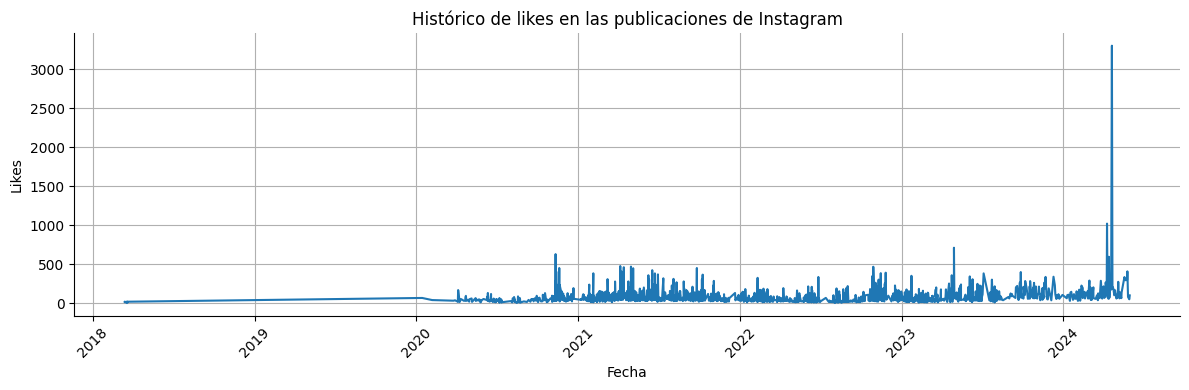

In [79]:
import matplotlib.pyplot as plt

# Crear un gráfico de serie de tiempo (fecha vs likes)
plt.figure(figsize=(12, 4))
plt.plot(df_json['fecha'], df_json['likes'])
#plt.plot(df_json['fecha'], df_json['likes'], marker='o', linestyle='-')
plt.title('Histórico de likes en las publicaciones de Instagram')
plt.xlabel('Fecha')
plt.ylabel('Likes')
plt.xticks(rotation=45)
plt.grid(True)

# Ajustar spines
ax = plt.gca()
ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()